In [1]:
# Heart Attack Prediction Model
print("Heart Attack Prediction Model")

Heart Attack Model


In [1]:
# importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score

In [2]:
# importing the csv file 
data = pd.read_csv('heart_attack_prediction_dataset.csv')
print(data.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [3]:
# Retriving info about Data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [4]:
# checking for any missing value
print(data.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [5]:
# Showing the description about data
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [6]:
# viewing datatypes of all the columns
data.dtypes


Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [7]:
"""Setting column 'Blood Pressure' 
Splitting Between Diastolic and Systolic Blood Pressure"""

data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

In [8]:
"""Ordinal Encoding for diet: 1:healthy, 2:average, 3:unhealthy"""
#using Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
data['Diet'] = data['Diet'].map(ordinal_map)

In [9]:
"""One_hot encoding for 'Sex(Gender)' """
data = pd.get_dummies(data, columns = ['Sex'])

In [10]:
"""Converting 'Object' and 'Boolean' Datatype into int"""
cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)

In [11]:
data.dtypes

Patient ID                          object
Age                                  int64
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

In [12]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'data' is your dataframe with the provided X and y
X = data[['Age', 'Cholesterol', 'Heart Rate',
           'Diabetes', 'Family History', 'Smoking', 'Obesity',
           'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
           'Previous Heart Problems', 'Medication Use', 'Stress Level',
           'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
           'Physical Activity Days Per Week', 'Sleep Hours Per Day',
           'BP_Systolic', 'BP_Diastolic', 'Sex_Female', 'Sex_Male']]

y = data['Heart Attack Risk']

# Split the data into training and testing sets (90% for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a logistic regression model
# logreg_model = LogisticRegression()

# # Train the model on the training set
# logreg_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = logreg_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print("\nConfusion Matrix:\n", conf_matrix)
# print("\nClassification Report:\n", classification_rep)


In [16]:
# Another way
# Assuming 'X_train' and 'y_train' are the training data
# Assuming 'X_test' and 'y_test' are the test data

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Define hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'max_iter': [100, 200, 300],           # Maximum number of iterations
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_logreg_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6385404789053591


In [23]:
# # applying neural network model
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

# # Assuming 'X' is your feature matrix and 'y' is your target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Create a neural network model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
#               loss='binary_crossentropy', 
#               metrics=['accuracy'])

# # Implement Early Stopping
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model
# history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, 
#                     validation_split=0.1, callbacks=[early_stopping])

# # Evaluate the model on the test set
# y_pred_probs = model.predict(X_test_scaled)
# y_pred = (y_pred_probs > 0.5).astype(int)

# # Convert predictions to 1D array
# y_pred = y_pred.flatten()

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")


Epoch 1/100
99/99 [==============================] - 2s 8ms/step - loss: 0.6806 - accuracy: 0.6139 - val_loss: 0.6700 - val_accuracy: 0.6462
Epoch 2/100
99/99 [==============================] - 1s 5ms/step - loss: 0.6652 - accuracy: 0.6337 - val_loss: 0.6648 - val_accuracy: 0.6462
Epoch 3/100
99/99 [==============================] - 1s 5ms/step - loss: 0.6581 - accuracy: 0.6369 - val_loss: 0.6649 - val_accuracy: 0.6462
Epoch 4/100
99/99 [==============================] - 1s 5ms/step - loss: 0.6587 - accuracy: 0.6405 - val_loss: 0.6647 - val_accuracy: 0.6462
Epoch 5/100
99/99 [==============================] - 1s 5ms/step - loss: 0.6551 - accuracy: 0.6405 - val_loss: 0.6612 - val_accuracy: 0.6462
Epoch 6/100
99/99 [==============================] - 1s 5ms/step - loss: 0.6566 - accuracy: 0.6410 - val_loss: 0.6632 - val_accuracy: 0.6462
Epoch 7/100
99/99 [==============================] - 1s 5ms/step - loss: 0.6529 - accuracy: 0.6418 - val_loss: 0.6600 - val_accuracy: 0.6462
Epoch 8/100
9

In [14]:
import numpy as np
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create multiple neural networks with different architectures
nn1 = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=1, early_stopping=True, validation_fraction=0.1)
nn2 = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500, random_state=1, early_stopping=True, validation_fraction=0.1)
nn3 = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=1, early_stopping=True, validation_fraction=0.1)


# Create a stacking classifier using RandomForest as the meta-classifier
stacked_model = StackingClassifier(
    estimators=[('nn1', nn1), ('nn2', nn2), ('nn3', nn3)],
    final_estimator=RandomForestClassifier(random_state=1)
)

# Train the stacking classifier
stacked_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = stacked_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.572405929304447


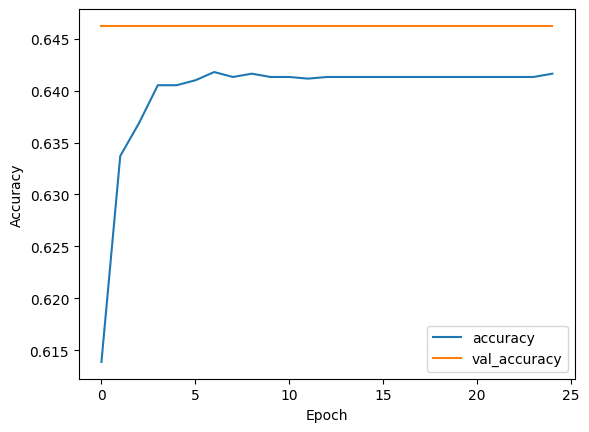

In [24]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
